# Testing (Without proper perspective)

In [1]:
import pandas as pd
from body_measurement import BodyMeasurement
import random

In [2]:
base_path = "../segmentation_testing/test2/testB/"

In [3]:
subject_map_path = base_path + "subject_to_photo_map.csv"
mes_path = base_path + "measurements.csv"
metadata_path = base_path + "hwg_metadata.csv"

In [4]:
subject_df = pd.read_csv(subject_map_path)
mes_df = pd.read_csv(mes_path)
metadata_df = pd.read_csv(metadata_path)
images_path = base_path + 'mask/'

In [5]:
fin_df = mes_df.merge(subject_df, on='subject_id', how='left')
fin_df = fin_df.merge(metadata_df, on='subject_id', how='left')
fin_df = fin_df[fin_df["gender"] == "male"]
fin_df = fin_df.groupby('subject_id').apply(lambda x: x.iloc[random.randint(0, len(x)-1)]).reset_index(drop=True)
fin_df["image_path"] = "../segmentation_testing/test2/train/mask/" + fin_df["photo_id"] + ".png"

/var/folders/2b/106xnqt95zj_l1lwlcqwj1p80000gn/T/ipykernel_42212/1927348722.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fin_df = fin_df.groupby('subject_id').apply(lambda x: x.iloc[random.randint(0, len(x)-1)]).reset_index(drop=True)


In [ ]:
import torch
import json
import os
from tqdm import tqdm
import time

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
output_dir = f"./segmentation_testing/iter_testing/iter_{str(int(time.time()))}/"
os.makedirs(output_dir, exist_ok=True)

if torch.backends.mps.is_available():
    torch.device("mps")
    torch.mps.set_per_process_memory_fraction(0.7)

all_results = {}
failed = []
for idx, row in tqdm(fin_df.iterrows(), total=len(fin_df)):
    try:
        photo_id = row["photo_id"]
        result = {
            **BodyMeasurement(
                image_path=images_path + photo_id + ".png",
                height=row["height"],
                is_silhouette=True,
                generate_visualizations=False,
                generate_measurements=False
            ).execute(),
            "original_measurements": {
                "shoulder_width": row["shoulder-breadth"],
                "total_height": row["height"]
            }
        }
        with open(os.path.join(output_dir, f"{photo_id}.json"), 'w') as f:
            json.dump(result, f, indent=4)
        all_results[photo_id] = result
    except:
        failed.append(photo_id)

  0%|          | 0/157 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1733807360.325203 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1733807360.659297 8866724 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807360.870288 8866722 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807361.458465 8866726 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


/opt/anaconda3/envs/tshirt-size/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0: 640x480 1 person, 8418.4ms
Speed: 11.8ms preprocess, 8418.4ms inference, 62.9ms postprocess per image at shape (1, 3, 640, 480)


  1%|          | 1/157 [00:14<36:44, 14.13s/it]I0000 00:00:1733807374.234909 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807374.545375 8866928 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807374.783476 8866928 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 11164.0ms
Speed: 10.8ms preprocess, 11164.0ms inference, 59.6ms postprocess per image at shape (1, 3, 640, 480)


  1%|▏         | 2/157 [00:28<37:27, 14.50s/it]I0000 00:00:1733807389.017538 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807389.418913 8867043 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807389.719644 8867043 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 11408.9ms
Speed: 19.1ms preprocess, 11408.9ms inference, 12.5ms postprocess per image at shape (1, 3, 640, 480)


  2%|▏         | 3/157 [00:44<38:24, 14.97s/it]I0000 00:00:1733807404.526835 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807404.898692 8867187 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807405.212087 8867190 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10659.2ms
Speed: 19.4ms preprocess, 10659.2ms inference, 16.7ms postprocess per image at shape (1, 3, 640, 480)


  3%|▎         | 4/157 [01:01<40:06, 15.73s/it]I0000 00:00:1733807421.443458 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807421.807498 8867400 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807422.522311 8867398 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9998.9ms
Speed: 12.2ms preprocess, 9998.9ms inference, 13.5ms postprocess per image at shape (1, 3, 640, 480)


  3%|▎         | 5/157 [01:15<38:41, 15.27s/it]I0000 00:00:1733807435.880793 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807436.474800 8867566 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807436.923146 8867567 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 13012.7ms
Speed: 42.3ms preprocess, 13012.7ms inference, 20.3ms postprocess per image at shape (1, 3, 640, 480)


  4%|▍         | 6/157 [01:34<41:28, 16.48s/it]I0000 00:00:1733807454.735009 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807455.225684 8867846 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807455.987061 8867845 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9437.6ms
Speed: 16.4ms preprocess, 9437.6ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 480)


  4%|▍         | 7/157 [01:50<40:44, 16.30s/it]I0000 00:00:1733807470.634850 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807471.063904 8867980 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807471.651920 8867983 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9501.1ms
Speed: 18.5ms preprocess, 9501.1ms inference, 15.3ms postprocess per image at shape (1, 3, 640, 480)


  5%|▌         | 8/157 [02:04<38:52, 15.66s/it]I0000 00:00:1733807484.972381 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807485.662196 8868129 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807486.009025 8868128 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9936.4ms
Speed: 12.4ms preprocess, 9936.4ms inference, 12.5ms postprocess per image at shape (1, 3, 640, 480)


  6%|▌         | 9/157 [02:20<38:26, 15.59s/it]I0000 00:00:1733807500.351346 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807500.706473 8868276 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807501.119548 8868274 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10992.7ms
Speed: 11.4ms preprocess, 10992.7ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 480)


  6%|▋         | 10/157 [02:35<38:12, 15.60s/it]I0000 00:00:1733807515.963003 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807516.288967 8868450 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807516.623559 8868457 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10038.0ms
Speed: 16.4ms preprocess, 10038.0ms inference, 13.2ms postprocess per image at shape (1, 3, 640, 480)


  7%|▋         | 11/157 [02:50<37:02, 15.23s/it]I0000 00:00:1733807530.347754 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807530.692953 8868571 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807531.124380 8868571 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 11770.4ms
Speed: 33.2ms preprocess, 11770.4ms inference, 15.3ms postprocess per image at shape (1, 3, 640, 480)


  8%|▊         | 12/157 [03:07<38:37, 15.98s/it]I0000 00:00:1733807548.081548 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807548.393075 8868835 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807548.576829 8868840 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8520.2ms
Speed: 10.9ms preprocess, 8520.2ms inference, 10.6ms postprocess per image at shape (1, 3, 640, 480)


  8%|▊         | 13/157 [03:20<36:10, 15.08s/it]I0000 00:00:1733807561.087532 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807561.513437 8868953 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807562.299461 8868953 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10275.3ms
Speed: 11.6ms preprocess, 10275.3ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 480)


  9%|▉         | 14/157 [03:36<36:18, 15.24s/it]I0000 00:00:1733807576.682074 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807577.017897 8869108 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807577.866481 8869108 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8529.0ms
Speed: 22.8ms preprocess, 8529.0ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 480)


 10%|▉         | 15/157 [03:50<35:12, 14.88s/it]I0000 00:00:1733807590.702676 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807591.097489 8869294 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807591.562997 8869294 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 12841.5ms
Speed: 31.6ms preprocess, 12841.5ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 480)


 10%|█         | 16/157 [04:08<37:17, 15.87s/it]I0000 00:00:1733807608.889387 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807609.395960 8869523 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807610.010374 8869523 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9917.9ms
Speed: 41.1ms preprocess, 9917.9ms inference, 13.1ms postprocess per image at shape (1, 3, 640, 480)


 11%|█         | 17/157 [04:23<36:30, 15.64s/it]I0000 00:00:1733807623.994248 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807624.417928 8869645 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807625.007951 8869652 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10713.8ms
Speed: 39.6ms preprocess, 10713.8ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 480)


 11%|█▏        | 18/157 [04:39<36:20, 15.68s/it]I0000 00:00:1733807639.783936 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807640.278094 8869757 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807640.852242 8869757 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 13697.2ms
Speed: 11.7ms preprocess, 13697.2ms inference, 145.3ms postprocess per image at shape (1, 3, 640, 480)


 12%|█▏        | 19/157 [04:58<38:11, 16.60s/it]I0000 00:00:1733807658.656391 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807659.104839 8870183 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807659.708542 8870189 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8745.9ms
Speed: 25.3ms preprocess, 8745.9ms inference, 64.6ms postprocess per image at shape (1, 3, 640, 480)


 13%|█▎        | 20/157 [05:12<36:05, 15.80s/it]I0000 00:00:1733807672.497360 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807672.800932 8870403 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807673.059776 8870404 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9387.7ms
Speed: 17.8ms preprocess, 9387.7ms inference, 15.9ms postprocess per image at shape (1, 3, 640, 480)


 13%|█▎        | 21/157 [05:28<35:49, 15.81s/it]I0000 00:00:1733807688.293998 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807688.746030 8870504 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807689.454590 8870507 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8794.3ms
Speed: 6.1ms preprocess, 8794.3ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 480)


 14%|█▍        | 22/157 [05:42<34:22, 15.28s/it]I0000 00:00:1733807702.330360 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807702.702107 8870874 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807703.276995 8870874 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10124.7ms
Speed: 29.9ms preprocess, 10124.7ms inference, 17.7ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▍        | 23/157 [05:57<34:16, 15.35s/it]I0000 00:00:1733807717.834466 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807718.252162 8871027 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807718.668231 8871027 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8987.6ms
Speed: 11.1ms preprocess, 8987.6ms inference, 14.6ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▌        | 24/157 [06:11<33:01, 14.90s/it]I0000 00:00:1733807731.713477 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807732.334947 8871174 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807733.424668 8871174 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9006.3ms
Speed: 20.5ms preprocess, 9006.3ms inference, 16.4ms postprocess per image at shape (1, 3, 640, 480)


 16%|█▌        | 25/157 [06:30<35:07, 15.97s/it]I0000 00:00:1733807750.168071 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807750.628575 8871420 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807751.509323 8871420 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8488.1ms
Speed: 16.2ms preprocess, 8488.1ms inference, 16.9ms postprocess per image at shape (1, 3, 640, 480)


 17%|█▋        | 26/157 [06:44<33:38, 15.41s/it]I0000 00:00:1733807764.239936 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807764.718735 8871513 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807765.220568 8871515 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8668.1ms
Speed: 8.7ms preprocess, 8668.1ms inference, 9.6ms postprocess per image at shape (1, 3, 640, 480)


 17%|█▋        | 27/157 [06:57<32:20, 14.93s/it]I0000 00:00:1733807778.064203 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807778.446328 8871602 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807778.840047 8871599 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 12745.5ms
Speed: 43.0ms preprocess, 12745.5ms inference, 94.0ms postprocess per image at shape (1, 3, 640, 480)


 18%|█▊        | 28/157 [07:18<35:24, 16.47s/it]I0000 00:00:1733807798.371920 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807798.850027 8871926 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807799.734515 8871930 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 11537.1ms
Speed: 10.6ms preprocess, 11537.1ms inference, 68.0ms postprocess per image at shape (1, 3, 640, 480)


 18%|█▊        | 29/157 [07:39<38:10, 17.89s/it]I0000 00:00:1733807819.426546 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807819.751172 8872196 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807820.488512 8872199 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10569.8ms
Speed: 81.6ms preprocess, 10569.8ms inference, 14.8ms postprocess per image at shape (1, 3, 640, 480)


 19%|█▉        | 30/157 [07:59<39:39, 18.73s/it]I0000 00:00:1733807840.059469 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807840.517044 8872420 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807841.132092 8872425 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9332.1ms
Speed: 15.0ms preprocess, 9332.1ms inference, 12.7ms postprocess per image at shape (1, 3, 640, 480)


 20%|█▉        | 31/157 [08:15<37:31, 17.87s/it]I0000 00:00:1733807855.881350 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807856.527308 8872603 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807857.279492 8872603 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10175.0ms
Speed: 50.2ms preprocess, 10175.0ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 480)


 20%|██        | 32/157 [08:32<36:27, 17.50s/it]Context leak detected, msgtracer returned -1
I0000 00:00:1733807872.568688 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807873.064552 8873116 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807873.649841 8873123 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10543.7ms
Speed: 16.7ms preprocess, 10543.7ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 480)


 21%|██        | 33/157 [08:50<36:25, 17.62s/it]I0000 00:00:1733807890.477864 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807890.978020 8873411 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807891.746972 8873411 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 11600.0ms
Speed: 24.5ms preprocess, 11600.0ms inference, 43.7ms postprocess per image at shape (1, 3, 640, 480)


 22%|██▏       | 34/157 [09:07<36:07, 17.62s/it]I0000 00:00:1733807908.104252 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807908.629186 8873750 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807909.701258 8873750 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10399.8ms
Speed: 18.3ms preprocess, 10399.8ms inference, 20.0ms postprocess per image at shape (1, 3, 640, 480)


 22%|██▏       | 35/157 [09:24<34:55, 17.17s/it]I0000 00:00:1733807924.205004 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807924.608678 8874024 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807925.036412 8874024 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8936.5ms
Speed: 109.5ms preprocess, 8936.5ms inference, 13.7ms postprocess per image at shape (1, 3, 640, 480)


 23%|██▎       | 36/157 [09:38<33:08, 16.44s/it]I0000 00:00:1733807938.933933 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807939.336667 8874165 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807939.590261 8874168 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10846.4ms
Speed: 6.7ms preprocess, 10846.4ms inference, 18.8ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▎       | 37/157 [09:56<33:43, 16.87s/it]I0000 00:00:1733807956.831942 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807957.262092 8874295 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807957.942912 8874296 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8812.2ms
Speed: 27.9ms preprocess, 8812.2ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▍       | 38/157 [10:12<32:36, 16.44s/it]I0000 00:00:1733807972.201534 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807972.586927 8874500 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807973.074406 8874500 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8192.6ms
Speed: 19.0ms preprocess, 8192.6ms inference, 14.8ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▍       | 39/157 [10:27<31:56, 16.24s/it]I0000 00:00:1733807987.990521 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733807988.542737 8874657 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733807989.226713 8874660 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9510.3ms
Speed: 29.9ms preprocess, 9510.3ms inference, 23.6ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▌       | 40/157 [10:44<31:59, 16.40s/it]I0000 00:00:1733808004.763057 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808005.148657 8874794 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808005.677161 8874797 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10083.5ms
Speed: 17.9ms preprocess, 10083.5ms inference, 20.2ms postprocess per image at shape (1, 3, 640, 480)


 26%|██▌       | 41/157 [11:00<31:21, 16.22s/it]I0000 00:00:1733808020.580179 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808021.065714 8875058 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808021.631492 8875059 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9774.2ms
Speed: 13.4ms preprocess, 9774.2ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 480)


 27%|██▋       | 42/157 [11:15<30:29, 15.91s/it]I0000 00:00:1733808035.743644 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808036.144089 8875156 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808036.508633 8875156 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9756.4ms
Speed: 7.6ms preprocess, 9756.4ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 480)


 27%|██▋       | 43/157 [11:29<29:06, 15.32s/it]I0000 00:00:1733808049.676773 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808050.046338 8875240 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808050.545160 8875240 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9831.3ms
Speed: 22.4ms preprocess, 9831.3ms inference, 22.7ms postprocess per image at shape (1, 3, 640, 480)


 28%|██▊       | 44/157 [11:44<28:47, 15.28s/it]I0000 00:00:1733808064.879727 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808065.232482 8875470 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808065.790152 8875477 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10371.8ms
Speed: 25.2ms preprocess, 10371.8ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 480)


 29%|██▊       | 45/157 [12:00<28:58, 15.52s/it]I0000 00:00:1733808080.974517 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808081.611787 8875625 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808081.976306 8875625 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 12798.9ms
Speed: 18.1ms preprocess, 12798.9ms inference, 39.3ms postprocess per image at shape (1, 3, 640, 480)


 29%|██▉       | 46/157 [12:17<29:36, 16.01s/it]I0000 00:00:1733808098.243881 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808098.654284 8875945 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808099.317674 8875945 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 11225.4ms
Speed: 27.0ms preprocess, 11225.4ms inference, 26.4ms postprocess per image at shape (1, 3, 640, 480)


 30%|██▉       | 47/157 [12:34<29:39, 16.18s/it]I0000 00:00:1733808114.749560 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808115.394753 8876150 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808116.137629 8876150 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10424.7ms
Speed: 19.4ms preprocess, 10424.7ms inference, 54.9ms postprocess per image at shape (1, 3, 640, 480)


 31%|███       | 48/157 [12:52<30:09, 16.60s/it]I0000 00:00:1733808132.427735 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808133.360610 8876289 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808134.205737 8876282 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10305.6ms
Speed: 34.6ms preprocess, 10305.6ms inference, 20.4ms postprocess per image at shape (1, 3, 640, 480)


 31%|███       | 49/157 [13:10<30:48, 17.12s/it]Context leak detected, msgtracer returned -1
I0000 00:00:1733808150.733537 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808151.085819 8876490 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808152.492759 8876490 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 7483.3ms
Speed: 14.1ms preprocess, 7483.3ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 50/157 [13:24<28:52, 16.19s/it]I0000 00:00:1733808164.664130 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808165.067037 8876605 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808165.724257 8876605 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 11344.8ms
Speed: 14.2ms preprocess, 11344.8ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 51/157 [13:41<28:55, 16.37s/it]I0000 00:00:1733808181.450824 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808181.817102 8876772 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808182.218880 8876772 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10248.0ms
Speed: 18.2ms preprocess, 10248.0ms inference, 12.8ms postprocess per image at shape (1, 3, 640, 480)


 33%|███▎      | 52/157 [13:56<27:47, 15.88s/it]I0000 00:00:1733808196.168755 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808196.539304 8876941 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808196.759359 8876941 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10661.7ms
Speed: 26.8ms preprocess, 10661.7ms inference, 12.5ms postprocess per image at shape (1, 3, 640, 480)


 34%|███▍      | 53/157 [14:12<27:59, 16.15s/it]I0000 00:00:1733808213.207286 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808213.942727 8877201 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808214.929159 8877206 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 13581.8ms
Speed: 31.6ms preprocess, 13581.8ms inference, 26.6ms postprocess per image at shape (1, 3, 640, 480)


 34%|███▍      | 54/157 [14:34<30:40, 17.87s/it]I0000 00:00:1733808234.855942 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808235.524961 8877549 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808236.349950 8877552 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10327.1ms
Speed: 22.0ms preprocess, 10327.1ms inference, 404.9ms postprocess per image at shape (1, 3, 640, 480)


 35%|███▌      | 55/157 [14:52<30:33, 17.97s/it]I0000 00:00:1733808253.688211 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808254.110144 8878409 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808254.530967 8878409 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 6124.3ms
Speed: 72.5ms preprocess, 6124.3ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▌      | 56/157 [15:10<30:14, 17.97s/it]I0000 00:00:1733808271.009437 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808271.719817 8878531 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808272.146782 8878531 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9491.4ms
Speed: 6.1ms preprocess, 9491.4ms inference, 21.1ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▋      | 57/157 [15:24<27:42, 16.63s/it]I0000 00:00:1733808284.557700 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808284.950059 8878616 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808285.480245 8878621 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8153.3ms
Speed: 7.7ms preprocess, 8153.3ms inference, 10.1ms postprocess per image at shape (1, 3, 640, 480)


 37%|███▋      | 58/157 [15:39<26:37, 16.14s/it]I0000 00:00:1733808299.480738 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808299.797051 8878798 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808300.101174 8878805 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8816.5ms
Speed: 14.6ms preprocess, 8816.5ms inference, 19.3ms postprocess per image at shape (1, 3, 640, 480)


 38%|███▊      | 59/157 [15:53<25:20, 15.52s/it]I0000 00:00:1733808313.546388 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808313.843066 8878931 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808314.100726 8878934 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8941.0ms
Speed: 20.8ms preprocess, 8941.0ms inference, 10.7ms postprocess per image at shape (1, 3, 640, 480)


 38%|███▊      | 60/157 [16:07<24:31, 15.17s/it]I0000 00:00:1733808327.920795 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808328.256192 8879089 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808328.496242 8879091 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9063.9ms
Speed: 7.3ms preprocess, 9063.9ms inference, 9.1ms postprocess per image at shape (1, 3, 640, 480)


 39%|███▉      | 61/157 [16:22<23:52, 14.92s/it]I0000 00:00:1733808342.283663 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808342.633265 8879181 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808343.093980 8879181 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9068.9ms
Speed: 14.4ms preprocess, 9068.9ms inference, 8.8ms postprocess per image at shape (1, 3, 640, 480)


 39%|███▉      | 62/157 [16:35<22:53, 14.46s/it]I0000 00:00:1733808355.642834 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808355.999414 8879298 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808356.476354 8879298 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 7512.7ms
Speed: 5.9ms preprocess, 7512.7ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 480)


 40%|████      | 63/157 [16:47<21:42, 13.85s/it]I0000 00:00:1733808368.060792 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808368.355199 8879381 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808368.596211 8879381 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 7330.5ms
Speed: 28.3ms preprocess, 7330.5ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 480)


 41%|████      | 64/157 [17:01<21:20, 13.77s/it]I0000 00:00:1733808381.680942 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808381.990494 8879451 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808382.288629 8879450 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8830.8ms
Speed: 32.8ms preprocess, 8830.8ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 480)


 41%|████▏     | 65/157 [17:16<21:37, 14.11s/it]I0000 00:00:1733808396.561304 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808396.956447 8879568 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808397.580559 8879571 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 7441.1ms
Speed: 20.6ms preprocess, 7441.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 480)


 42%|████▏     | 66/157 [17:28<20:39, 13.62s/it]Context leak detected, msgtracer returned -1
I0000 00:00:1733808409.024303 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808409.292645 8879645 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808409.455811 8879645 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9164.7ms
Speed: 14.6ms preprocess, 9164.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 480)


 43%|████▎     | 67/157 [17:43<20:41, 13.80s/it]I0000 00:00:1733808423.242357 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808423.626709 8879738 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808424.337088 8879738 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8765.5ms
Speed: 48.6ms preprocess, 8765.5ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 480)


 43%|████▎     | 68/157 [17:55<20:01, 13.50s/it]I0000 00:00:1733808436.046907 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808436.369243 8879837 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808436.559930 8879838 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8873.0ms
Speed: 8.5ms preprocess, 8873.0ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 480)


 44%|████▍     | 69/157 [18:10<20:04, 13.69s/it]I0000 00:00:1733808450.206931 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808450.588232 8879927 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808451.025607 8879927 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10230.5ms
Speed: 20.6ms preprocess, 10230.5ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 480)


 45%|████▍     | 70/157 [18:25<20:32, 14.17s/it]I0000 00:00:1733808465.491079 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808465.909948 8880105 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808466.316345 8880104 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 10169.7ms
Speed: 24.6ms preprocess, 10169.7ms inference, 10.6ms postprocess per image at shape (1, 3, 640, 480)


 45%|████▌     | 71/157 [18:40<20:46, 14.50s/it]I0000 00:00:1733808480.985666 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808481.622262 8880285 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808482.015538 8880287 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9235.5ms
Speed: 10.5ms preprocess, 9235.5ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 480)


 46%|████▌     | 72/157 [18:55<20:44, 14.64s/it]I0000 00:00:1733808495.771590 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808496.128402 8880398 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808496.590640 8880398 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9783.1ms
Speed: 16.9ms preprocess, 9783.1ms inference, 13.3ms postprocess per image at shape (1, 3, 640, 480)


 46%|████▋     | 73/157 [19:10<20:44, 14.81s/it]I0000 00:00:1733808510.929649 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808511.361181 8880490 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808511.894473 8880490 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 7714.4ms
Speed: 9.6ms preprocess, 7714.4ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 480)


 47%|████▋     | 74/157 [19:23<19:30, 14.10s/it]I0000 00:00:1733808523.372482 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808523.702836 8880572 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808524.299766 8880575 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8417.2ms
Speed: 9.5ms preprocess, 8417.2ms inference, 15.3ms postprocess per image at shape (1, 3, 640, 480)


 48%|████▊     | 75/157 [19:37<19:18, 14.12s/it]I0000 00:00:1733808537.569451 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808537.914662 8880672 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808538.291752 8880672 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8283.4ms
Speed: 15.9ms preprocess, 8283.4ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 480)


 48%|████▊     | 76/157 [19:50<18:39, 13.82s/it]I0000 00:00:1733808550.654848 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808550.956102 8880750 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808551.166577 8880754 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9330.6ms
Speed: 7.8ms preprocess, 9330.6ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 480)


 49%|████▉     | 77/157 [20:06<19:18, 14.48s/it]I0000 00:00:1733808566.691428 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808567.148607 8880902 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808567.466975 8880902 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 7712.9ms
Speed: 67.1ms preprocess, 7712.9ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 480)


 50%|████▉     | 78/157 [20:20<18:42, 14.21s/it]I0000 00:00:1733808580.263367 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808580.588554 8880979 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808581.026300 8880979 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9085.1ms
Speed: 23.5ms preprocess, 9085.1ms inference, 12.2ms postprocess per image at shape (1, 3, 640, 480)


 50%|█████     | 79/157 [20:35<18:54, 14.54s/it]I0000 00:00:1733808595.581063 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808595.976602 8881097 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808596.421879 8881098 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9307.1ms
Speed: 18.7ms preprocess, 9307.1ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 480)


 51%|█████     | 80/157 [20:49<18:26, 14.37s/it]I0000 00:00:1733808609.554820 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808609.893517 8881183 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808610.160682 8881183 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8660.0ms
Speed: 20.4ms preprocess, 8660.0ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 480)


 52%|█████▏    | 81/157 [21:02<17:32, 13.84s/it]I0000 00:00:1733808622.144787 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808622.531336 8881311 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808622.991494 8881313 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8884.7ms
Speed: 14.9ms preprocess, 8884.7ms inference, 10.6ms postprocess per image at shape (1, 3, 640, 480)


 52%|█████▏    | 82/157 [21:16<17:36, 14.09s/it]Context leak detected, msgtracer returned -1
I0000 00:00:1733808636.810037 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808637.136803 8881421 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808637.566267 8881423 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8992.9ms
Speed: 9.0ms preprocess, 8992.9ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 480)


 53%|█████▎    | 83/157 [21:29<16:58, 13.77s/it]I0000 00:00:1733808649.849272 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808650.136245 8881491 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808650.500961 8881491 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9758.5ms
Speed: 23.5ms preprocess, 9758.5ms inference, 22.5ms postprocess per image at shape (1, 3, 640, 480)


 54%|█████▎    | 84/157 [21:44<16:57, 13.94s/it]I0000 00:00:1733808664.194142 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808664.549857 8881631 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808664.719422 8881636 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8982.9ms
Speed: 5.3ms preprocess, 8982.9ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 480)


 54%|█████▍    | 85/157 [21:58<17:04, 14.23s/it]I0000 00:00:1733808679.080779 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808679.528122 8881719 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808679.928836 8881726 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8483.9ms
Speed: 16.3ms preprocess, 8483.9ms inference, 26.4ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▍    | 86/157 [22:12<16:40, 14.09s/it]I0000 00:00:1733808692.846961 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808693.424297 8881832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808694.100863 8881832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 7688.3ms
Speed: 7.3ms preprocess, 7688.3ms inference, 15.4ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▌    | 87/157 [22:26<16:26, 14.09s/it]I0000 00:00:1733808706.937089 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808707.409054 8881947 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808708.028903 8881947 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9022.1ms
Speed: 10.7ms preprocess, 9022.1ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 480)


 56%|█████▌    | 88/157 [22:41<16:18, 14.18s/it]I0000 00:00:1733808721.345047 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808721.711591 8882043 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808721.989071 8882048 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8321.5ms
Speed: 32.4ms preprocess, 8321.5ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 480)


 57%|█████▋    | 89/157 [22:54<15:53, 14.02s/it]I0000 00:00:1733808734.981781 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808735.324322 8882140 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808735.703448 8882140 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 7155.6ms
Speed: 26.6ms preprocess, 7155.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 480)


 57%|█████▋    | 90/157 [23:06<14:59, 13.42s/it]I0000 00:00:1733808746.989199 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808747.394811 8882248 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808747.693306 8882250 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9313.7ms
Speed: 16.2ms preprocess, 9313.7ms inference, 12.2ms postprocess per image at shape (1, 3, 640, 480)


 58%|█████▊    | 91/157 [23:19<14:39, 13.33s/it]I0000 00:00:1733808760.090945 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808760.619554 8882347 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808761.117053 8882347 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9418.2ms
Speed: 19.3ms preprocess, 9418.2ms inference, 12.6ms postprocess per image at shape (1, 3, 640, 480)


 59%|█████▊    | 92/157 [23:33<14:35, 13.47s/it]I0000 00:00:1733808773.944504 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808774.308983 8882459 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808774.536351 8882459 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8248.0ms
Speed: 39.4ms preprocess, 8248.0ms inference, 12.8ms postprocess per image at shape (1, 3, 640, 480)


 59%|█████▉    | 93/157 [23:48<14:45, 13.84s/it]I0000 00:00:1733808788.603600 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808788.985119 8882597 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808789.834886 8882597 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 6948.7ms
Speed: 23.0ms preprocess, 6948.7ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 480)


 60%|█████▉    | 94/157 [24:02<14:30, 13.82s/it]I0000 00:00:1733808802.385378 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808802.719115 8882700 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808803.071469 8882700 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9658.7ms
Speed: 12.5ms preprocess, 9658.7ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████    | 95/157 [24:18<15:00, 14.53s/it]I0000 00:00:1733808818.569253 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808818.943122 8883061 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808819.391220 8883061 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9192.7ms
Speed: 25.7ms preprocess, 9192.7ms inference, 11.8ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████    | 96/157 [24:32<14:35, 14.36s/it]I0000 00:00:1733808832.543247 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808832.896898 8883135 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808833.237269 8883135 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9602.7ms
Speed: 18.2ms preprocess, 9602.7ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 97/157 [24:46<14:19, 14.32s/it]I0000 00:00:1733808846.781787 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808847.090933 8883322 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808847.452150 8883328 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8737.8ms
Speed: 7.2ms preprocess, 8737.8ms inference, 19.6ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 98/157 [24:59<13:36, 13.84s/it]I0000 00:00:1733808859.485511 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808859.864012 8883429 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808860.226763 8883429 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8990.8ms
Speed: 43.5ms preprocess, 8990.8ms inference, 13.5ms postprocess per image at shape (1, 3, 640, 480)


 63%|██████▎   | 99/157 [25:13<13:30, 13.98s/it]Context leak detected, msgtracer returned -1
I0000 00:00:1733808873.782398 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808874.243356 8883537 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808874.768399 8883539 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 7683.1ms
Speed: 26.6ms preprocess, 7683.1ms inference, 10.8ms postprocess per image at shape (1, 3, 640, 480)


 64%|██████▎   | 100/157 [25:27<13:05, 13.79s/it]I0000 00:00:1733808887.123972 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808887.463754 8883633 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808887.684205 8883633 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 9360.4ms
Speed: 42.2ms preprocess, 9360.4ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 480)


 64%|██████▍   | 101/157 [25:42<13:14, 14.19s/it]I0000 00:00:1733808902.276596 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808902.678701 8883752 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808903.133886 8883752 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x480 1 person, 8931.6ms
Speed: 17.8ms preprocess, 8931.6ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 480)


 65%|██████▍   | 102/157 [25:56<13:10, 14.38s/it]I0000 00:00:1733808917.118355 8866261 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733808917.580791 8883871 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733808918.241326 8883871 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [6]:
import os
import json
import numpy as np

data_dir = "./segmentation_testing/iter_testing/iter_1733734732/"
ans = {}

for filename in os.listdir(data_dir):
    if filename.endswith('.json'):
        file_path = os.path.join(data_dir, filename)
        with open(file_path, 'r') as f:
            ans[filename.replace('.json', '')] = json.load(f)

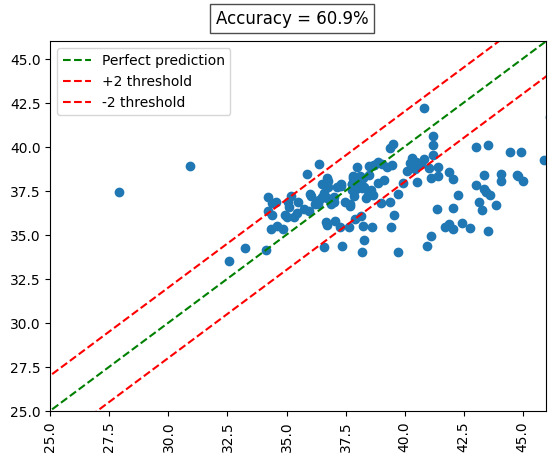

Accuracy = 60.89743589743589%


In [7]:
import matplotlib.pyplot as plt

treshold = 2.5

photo_ids = []
for photo_id, val in ans.items():
    if ("shoulder_width" in ans[photo_id]["real_measurements"]):
        photo_ids.append(photo_id)
predict_vals = [ans[photo_id]["real_measurements"]["shoulder_width"] for photo_id in photo_ids]
actual_val = [ans[photo_id]["original_measurements"]["shoulder_width"] for photo_id in photo_ids]

good = 0
for a,b in zip(predict_vals, actual_val):
    c = abs(a - b)
    if (c <= treshold and c >= -treshold):
        good += 1
accuracy = good / len(photo_ids)

plt.scatter(predict_vals, actual_val)
line_range = np.linspace(20, 50, 100)
plt.plot(line_range, line_range, '--', color='green', label='Perfect prediction')
plt.plot(line_range, line_range + 2, '--', color='red', label='+2 threshold')
plt.plot(line_range, line_range - 2, '--', color='red', label='-2 threshold')
plt.xlim(25, 46)
plt.ylim(25, 46)
plt.text(32, 47, f'Accuracy = {round(accuracy*100, 2)}%', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.xticks(rotation=90)
plt.legend()
plt.show()


print(f"Accuracy = {accuracy * 100}%")

In [8]:
import sys
sys.path.append('..')
from utils import r2_threshold, mae_threshold, rmse_threshold

In [9]:
rmse_threshold(np.array(predict_vals), np.array(actual_val))

(3.7582142829616867, 60.89743589743589)

In [10]:
mae_threshold(np.array(predict_vals), np.array(actual_val))

(2.748776149100761, 60.89743589743589)